In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [2]:
# Load the dataset
file_path = '../data/owid-covid-data.csv'
data = pd.read_csv(file_path, parse_dates=True)
data = data[['date', 'new_deaths']]

data.set_index('date', inplace=True)
data = data.groupby('date').sum().reset_index()



In [3]:
from statsmodels.tsa.stattools import adfuller
data = data.dropna()
def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
adf_test(data['new_deaths'])

1. ADF :  -2.16407040266354
2. P-Value :  0.21954320991500131
3. Num Of Lags :  17
4. Num Of Observations Used For ADF Regression: 1348
5. Critical Values :
	 1% :  -3.435210382964628
	 5% :  -2.8636864858936333
	 10% :  -2.5679127921571907


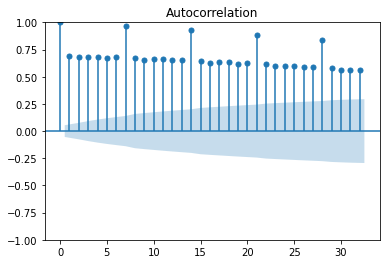

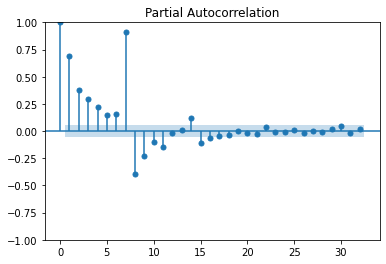

In [4]:
# Plot ACF and PACF for ARIMA order identification
train = data[['new_deaths']].iloc[:-60]
test = data[['new_deaths']].iloc[-60:]
plot_acf(train)
plt.show()

plot_pacf(train)
plt.show()

In [10]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the p, d, and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, d, and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d, and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]  # Assuming a seasonal period of 12

min_aic = float('inf')
best_order = None
best_seasonal_order = None

for order in pdq:
    for seasonal_order in seasonal_pdq:
        try:
            model = SARIMAX(train['new_deaths'], order=order, seasonal_order=seasonal_order)
            results = model.fit()
            if results.aic < min_aic:
                min_aic = results.aic
                best_order = order
                best_seasonal_order = seasonal_order
        except Exception as e:
            print(e)
            continue

print(f"Best ARIMA Order: {best_order}")
print(f"Best Seasonal Order: {best_seasonal_order}")


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


LU decomposition error.


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retva

LU decomposition error.


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible st

LU decomposition error.


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


LU decomposition error.


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("M

Best ARIMA Order: (0, 1, 2)
Best Seasonal Order: (2, 1, 1, 12)


In [6]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train['new_deaths'],order=(5,1,5), seasonal_order=best_seasonal_order)
model=model.fit()
model.summary()

c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             new_deaths   No. Observations:                 1306
Model:               SARIMAX(5, 1, 5)   Log Likelihood              -13640.358
Date:                Sun, 08 Oct 2023   AIC                          27302.717
Time:                        20:53:42   BIC                          27359.630
Sample:                             0   HQIC                         27324.067
                               - 1306                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0488      0.082      0.594      0.552      -0.112       0.210
ar.L2         -0.8368      0.076    -11.035      0.000      -0.985      -0.688
ar.L3         -0.2784      0.121     -2.298      0.022      -0.516      -0.041
ar.L4         -0.3813      0.073     -5.215      0.000      -0.525      -0.238
ar.L5         -0.7299      0.080     -9.143      0.000      -0.886      -0.573
ma.L1         -1.3365      0.098    -13.658      0.000      -1.528      -1.145
ma.L2          1.6096      0.169      9.521      0.000       1.278       1.941
ma.L3         -1.3158      0.187     -7.038      0.000      -1.682      -0.949
ma.L4          0.9610      0.125      7.717      0.000       0.717       1.205
ma.L5         -0.3523      0.084     -4.207      0.000      -0.516      -0.188
sigma2      1.472e+08   3.34e-09   4.41e+16      0.000    1.47e+08    1.47e+08
===================================================================================
Ljung-Box (L1) (Q):                  17.02   Jarque-Bera (JB):              8441.66
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.16   Skew:                             1.75
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.34e+32. Standard errors may be unstable.
"""

c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

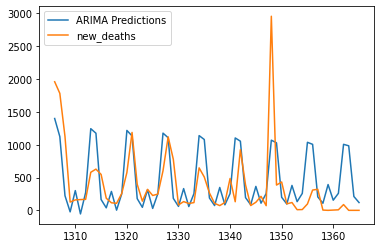

In [7]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['new_deaths'].plot(legend=True)

In [8]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['new_deaths'].mean()
rmse=sqrt(mean_squared_error(pred,test['new_deaths']))
print(rmse)

471.6721252834439
